In [1]:
import numpy as np
import pickle
import gzip

In [2]:
def read_mnist(mnist_file):
    """
    Reads MNIST data.
    
    Parameters
    ----------
    mnist_file : string
        The name of the MNIST file (e.g., 'mnist.pkl.gz').
    
    Returns
    -------
    (train_X, train_Y, val_X, val_Y, test_X, test_Y) : tuple
        train_X : numpy array, shape (N=50000, d=784)
            Input vectors of the training set.
        train_Y: numpy array, shape (N=50000)
            Outputs of the training set.
        val_X : numpy array, shape (N=10000, d=784)
            Input vectors of the validation set.
        val_Y: numpy array, shape (N=10000)
            Outputs of the validation set.
        test_X : numpy array, shape (N=10000, d=784)
            Input vectors of the test set.
        test_Y: numpy array, shape (N=10000)
            Outputs of the test set.
    """
    f = gzip.open(mnist_file, 'rb')
    train_data, val_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    
    train_X, train_Y = train_data
    val_X, val_Y = val_data
    test_X, test_Y = test_data    
    
    return train_X, train_Y, val_X, val_Y, test_X, test_Y

In [3]:
# Test
train_X, train_Y, val_X, val_Y, test_X, test_Y = read_mnist('mnist.pkl.gz')

print('train_X.shape =', train_X.shape)
print('train_Y.shape =', train_Y.shape)
print('val_X.shape   =', val_X.shape)
print('val_Y.shape   =', val_Y.shape)
print('test_X.shape  =', test_X.shape)
print('test_Y.shape  =', test_Y.shape)

print('\ntrain_X: min = %.3f, max = %.3f' %(train_X.min(), train_X.max()))
print('train_Y: min = %d, max = %d' %(train_Y.min(), train_Y.max()))

train_X.shape = (50000, 784)
train_Y.shape = (50000,)
val_X.shape   = (10000, 784)
val_Y.shape   = (10000,)
test_X.shape  = (10000, 784)
test_Y.shape  = (10000,)

train_X: min = 0.000, max = 0.996
train_Y: min = 0, max = 9


In [ ]:
from sklearn.svm import SVC
clf = SVC(C = 1.0, kernel = 'linear', gamma = 'auto', max_iter = 50000)
%time clf.fit(train_X, train_Y)
err_train = 1 - clf.score(train_X, train_Y)
err_val = 1 - clf.score(val_X, val_Y)
print("train score: ", clf.score(train_X, train_Y))
print("validation score: ", clf.score(val_X, val_Y))
#return err_train, err_val

#### Test theo documents

In [4]:
from sklearn.svm import LinearSVC
#clf = LinearSVC(random_state=0, tol=1e-5, max_iter = 50000)
clf = LinearSVC(C=0.25, max_iter = 50000)
%time clf.fit(train_X, train_Y)
print(clf.score(train_X, train_Y))
print(clf.score(val_X, val_Y))

Wall time: 47.8 s
0.9247
0.9213


In [5]:
def run_linear_kernel(train_X, train_Y, val_X, val_Y, c):
    clf = LinearSVC(C = c, max_iter = 50000)
    clf.fit(train_X, train_Y)
    err_train = 1 - clf.score(train_X, train_Y)
    err_val = 1 - clf.score(val_X, val_Y)
    print("train score: ", clf.score(train_X, train_Y))
    print("validation score: ", clf.score(val_X, val_Y))
    return err_train, err_val

In [22]:
%time err_train, err_val = run_linear_kernel(train_X, train_Y, val_X, val_Y, 4)
print("Error train: ", err_train)
print("Error validation: ", err_val)

train score:  0.9274
validation score:  0.9206
Wall time: 25min 45s
Error train:  0.0726
Error validation:  0.07940000000000003


In [6]:
def run_SVM(c_start, maxC):
    """
    """
    c = c_start
    k = 0
    err_train = 0
    err_val = 0
    C = []
    E_trains = []
    E_vals = []
    while (k <= maxC):
        print(k+1)
        c += 0.05
        print("C = ", c)
        %time err_train, err_val = run_linear_kernel(train_X, train_Y, val_X, val_Y, c)
        #print("Error train: ", err_train)
        #print("Error validation: ", err_val)
        C.append(c)
        E_trains.append(err_train)
        E_vals.append(err_val)
        k += 1
    return C, E_trains, E_vals

In [13]:
%time C, E_trains, E_vals = run_SVM(0, 20)

1
C =  0.05
train score:  0.92274
validation score:  0.9215
Wall time: 19.5 s
2
C =  0.1
train score:  0.92396
validation score:  0.9214
Wall time: 32.9 s
3
C =  0.15000000000000002
train score:  0.92424
validation score:  0.921
Wall time: 48.4 s
4
C =  0.2
train score:  0.9244
validation score:  0.921
Wall time: 1min 1s
5
C =  0.25
train score:  0.9247
validation score:  0.9213
Wall time: 1min 22s
6
C =  0.3
train score:  0.92496
validation score:  0.9218
Wall time: 1min 36s
7
C =  0.35
train score:  0.9253
validation score:  0.9216
Wall time: 1min 46s
8
C =  0.39999999999999997
train score:  0.9253
validation score:  0.9215
Wall time: 2min 17s
9
C =  0.44999999999999996
train score:  0.92536
validation score:  0.9211
Wall time: 2min 42s
10
C =  0.49999999999999994
train score:  0.9255
validation score:  0.9212
Wall time: 3min 13s
11
C =  0.5499999999999999
train score:  0.92564
validation score:  0.9213
Wall time: 2min 56s
12
C =  0.6
train score:  0.92566
validation score:  0.9212
W

In [19]:
print(E_trains)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
run_SVM(1, 20)

1
C =  1.05
train score:  0.92634
validation score:  0.9207
Wall time: 3min 49s
2
C =  1.1
train score:  0.92634
validation score:  0.9206
Wall time: 3min 50s
3
C =  1.1500000000000001
train score:  0.92638
validation score:  0.9206
Wall time: 4min 7s
4
C =  1.2000000000000002
train score:  0.92648
validation score:  0.9208
Wall time: 4min 27s
5
C =  1.2500000000000002
train score:  0.92662
validation score:  0.9208
Wall time: 4min 29s
6
C =  1.3000000000000003
train score:  0.92662
validation score:  0.9207
Wall time: 4min 34s
7
C =  1.3500000000000003
train score:  0.9266
validation score:  0.9207
Wall time: 5min 49s
8
C =  1.4000000000000004
train score:  0.92664
validation score:  0.9207
Wall time: 6min 12s
9
C =  1.4500000000000004
train score:  0.92668
validation score:  0.9207
Wall time: 5min 19s
10
C =  1.5000000000000004
train score:  0.9267
validation score:  0.9207
Wall time: 6min
11
C =  1.5500000000000005
train score:  0.9267
validation score:  0.9207
Wall time: 6min 36s
1

([1.05,
  1.1,
  1.1500000000000001,
  1.2000000000000002,
  1.2500000000000002,
  1.3000000000000003,
  1.3500000000000003,
  1.4000000000000004,
  1.4500000000000004,
  1.5000000000000004,
  1.5500000000000005,
  1.6000000000000005,
  1.6500000000000006,
  1.7000000000000006,
  1.7500000000000007,
  1.8000000000000007,
  1.8500000000000008,
  1.9000000000000008,
  1.9500000000000008,
  2.000000000000001,
  2.0500000000000007],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
C = np.array([1.05,
  1.1,
  1.1500000000000001,
  1.2000000000000002,
  1.2500000000000002,
  1.3000000000000003,
  1.3500000000000003,
  1.4000000000000004,
  1.4500000000000004,
  1.5000000000000004,
  1.5500000000000005,
  1.6000000000000005,
  1.6500000000000006,
  1.7000000000000006,
  1.7500000000000007,
  1.8000000000000007,
  1.8500000000000008,
  1.9000000000000008,
  1.9500000000000008,
  2.000000000000001,
  2.0500000000000007])
score_trains = np.array([0.92634, 0.92634, 0.92638, 0.92648, 0.92662, 0.92662, 0.9266, 
                         0.92664,0.92668, 0.9267, 0.9267, 0.92674, 0.92678, 0.92682, 
                         0.92686, 0.92688, 0.9269, 0.92694, 0.92694, 0.92694, 0.92694])
score_vals = np.array([0.9207, 0.9206, 0.9206, 0.9208, 0.9208, 0.9207, 0.9207, 
                       0.9207, 0.9207, 0.9207, 0.9207, 0.9207, 0.9206, 0.9207, 
                       0.9206, 0.9206, 0.9207, 0.9207, 0.9207, 0.9207, 0.9207])

In [16]:
print(score_trains.shape)
print(score_vals.shape)
print(C)

(21,)
(21,)
[1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65 1.7
 1.75 1.8  1.85 1.9  1.95 2.   2.05]


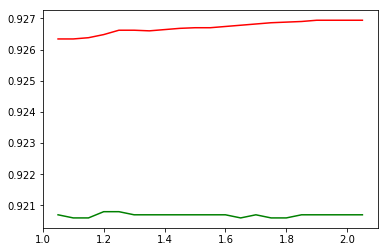

In [21]:
import matplotlib.pyplot as plt
plt.plot(C, score_trains, 'r') # plotting t, a separately 
plt.plot(C, score_vals, 'g') # plotting t, b separately 
plt.show()